In [1]:
import pandas as pd
import numpy as np
import re
import os
from tika import parser
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
sns.set(style="ticks", color_codes=True)

In [2]:
files = [file for file in os.listdir() if ".pdf" in file]
files

['Chicago13.pdf',
 'Chicago12.pdf',
 'Chicago10.pdf',
 'westpoint1.pdf',
 'Chicago11.pdf',
 'Chicago15.pdf',
 'Wharton3.pdf',
 'Wharton2.pdf',
 'UCLA1.pdf',
 'Chicago14.pdf',
 'Chicago16.pdf',
 'USC1.pdf',
 'carnegie1.pdf',
 'Wharton1.pdf',
 'Chicago17.pdf',
 'Chicago3.pdf',
 'Harvard2.pdf',
 'Columbia3.pdf',
 'Berkeley1.pdf',
 'Columbia2.pdf',
 'Harvard3.pdf',
 'Chicago2.pdf',
 'Harvard1.pdf',
 'Berkeley2.pdf',
 'Columbia1.pdf',
 'Chicago1.pdf',
 'Yale4.pdf',
 'Chicago5.pdf',
 'Harvard4.pdf',
 'Michigan1.pdf',
 'Harvard5.pdf',
 'Chicago4.pdf',
 'Yale1.pdf',
 'Yale3.pdf',
 'Chicago6.pdf',
 'Harvard7.pdf',
 'Harvard6.pdf',
 'Chicago7.pdf',
 'Yale2.pdf',
 'Stanford1.pdf',
 'Chicago9.pdf',
 'Harvard8.pdf',
 'Harvard9.pdf',
 'Chicago8.pdf',
 'NYU2.pdf',
 'Harvard10.pdf',
 'Kellogg2.pdf',
 'MIT1.pdf',
 'NYU1.pdf',
 'Kellogg1.pdf',
 'MIT2.pdf',
 'Germany1.pdf',
 'Chicago18.pdf',
 'LSE1.pdf',
 'Barcelona1.pdf']

In [3]:
file_dict = dict()
for file in files:
    file_dict[file.lower()] = re.sub(r'\s+', ' ',
        re.sub(
            r'\n+', '', parser.from_file(file)['content']
        )
    ).lower()
ads = (
    pd.DataFrame.from_dict(file_dict, orient = 'index')
    .rename(columns = {0: 'text'})
    .rename_axis('ad_name',axis=0)
)
ads['school'] = ads.index.to_series().str.extract(r'(\D+)')

In [4]:
ads.head()

,text,school
ad_name,,
chicago13.pdf,"job title: research professional – full-time,...",chicago
chicago12.pdf,"job title: research professional – full-time,...",chicago
chicago10.pdf,job title: research professional – big data i...,chicago
westpoint1.pdf,"data analyst location: west point, ny, usa dea...",westpoint
chicago11.pdf,job title: research professional – chicago ex...,chicago


In [5]:
# Patterns
research_pattern = r"""(?P<ra_exp>\s\S+\s\S+\s
(
prior\sresearch\sexperience|
relevant\sresearch\sexperience,?|
(previous|prior)\sexperience\s(?:as\s(a|an)\s)research\b
)
\s\S+\s\S+\s\S+)"""

stata_pattern = r'(?P<stata>stata\b\S*\s\S+\s\S+\s\S+\s\S+)'
python_pattern = r'(?P<python>python\b\S*\s\S+\s\S+\s\S+)'
r_pattern = r'(?P<r>\br\b(?!\.))'
c_pattern = r'(?P<c>\bc\b(?=\.))'
c_plus_pattern = r'(?P<c_plus>c\+\+)'
sql_pattern = r'(?P<sql>\bsql\b)'
ml_pattern = r'(?P<ml>\bmachine\slearning\b)'
sas_pattern = r'(?P<sas>\bsas\b)'
salary_pattern = r'(?P<salary>\d{2},\d{3})'

pattern_dict = {
    "ra_exp":research_pattern,
    "stata":stata_pattern,
    "python":python_pattern,
    "r":r_pattern,
    "c":c_pattern,
    "c_plus":c_plus_pattern,
    "sql":sql_pattern,
    "sas":sas_pattern,
    "ml":ml_pattern,
    "salary":salary_pattern
}

In [6]:
for name, pattern in pattern_dict.items():
    ads[name] = ads['text'].str.extract(pattern, flags=re.I|re.S|re.X)[name]
ads.head()

,text,school,ra_exp,stata,python,r,c,c_plus,sql,sas,ml,salary
ad_name,,,,,,,,,,,,
chicago13.pdf,"job title: research professional – full-time,...",chicago,"experience 1) relevant research experience, e...","stata, or r, and familiarity",python with interest in,r,c,c++,NaN,NaN,NaN,NaN
chicago12.pdf,"job title: research professional – full-time,...",chicago,"experience 1) relevant research experience, e...","stata, or r, and familiarity",python with interest in,r,c,c++,NaN,NaN,NaN,NaN
chicago10.pdf,job title: research professional – big data i...,chicago,"experience 1) relevant research experience, e...","stata, python, matlab, and/or r","python, r, and/or julie.",r,c,NaN,NaN,NaN,machine learning,NaN
westpoint1.pdf,"data analyst location: west point, ny, usa dea...",westpoint,NaN,"stata salary range: $50,000 to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"50,000"
chicago11.pdf,job title: research professional – chicago ex...,chicago,"preferred • relevant research experience, esp...","stata, python, matlab, and/or r","python, matlab, and/or r",r,c,NaN,NaN,NaN,NaN,NaN


In [7]:
columns = [
    'ra_exp',
    'stata',
    'python',
    'r',
    'c',
    'c_plus',
    'sql',
    'sas',
    'ml'
]

for col in columns:
    ads[col] = ads[col].apply(lambda x: 0 if pd.isna(x) else 1)

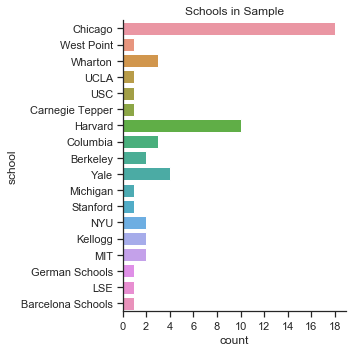

In [12]:
sns.catplot(y='school',kind='count',data=ads)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Schools in Sample')
plt.gca().set_yticklabels([
    'Chicago',
    'West Point',
    'Wharton',
    'UCLA',
    'USC',
    'Carnegie Tepper',
    'Harvard',
    'Columbia',
    'Berkeley',
    'Yale',
    'Michigan',
    'Stanford',
    'NYU',
    'Kellogg',
    'MIT',
    'German Schools',
    'LSE',
    'Barcelona Schools'
])
plt.tight_layout()
plt.savefig('schools.png', dpi=600)

In [9]:
sums = ads[['ra_exp','stata','python','r','c','c_plus','sql','sas','ml']].apply(lambda x: sum(x)/len(x))
sums

ra_exp    0.363636
stata     0.836364
python    0.727273
r         0.654545
c         0.254545
c_plus    0.072727
sql       0.127273
sas       0.200000
ml        0.127273
dtype: float64

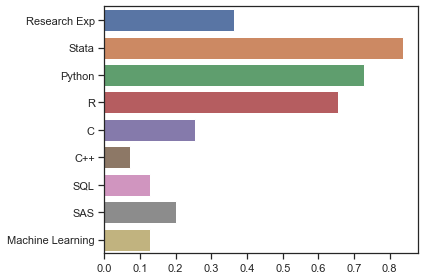

In [10]:
sns.barplot(x=sums.values, y=sums.index)
plt.gca().set_yticklabels(['Research Exp','Stata','Python','R','C','C++','SQL','SAS','Machine Learning'])
plt.tight_layout()
plt.savefig('skill_fractions.png', dpi=600)

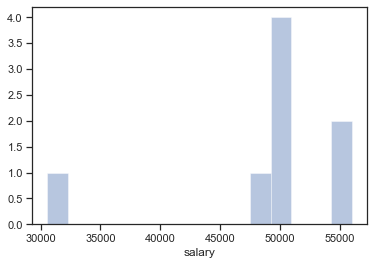

In [11]:
sns.distplot(ads['salary'].dropna().str.replace(',', '').astype(float), kde=False, rug=False)
plt.savefig('salary.png', dpi=600)